In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import torch

In [ ]:
import tensorflow as tf
import keras
import os, shutil 
# 原始目录所在的路径
original_dataset_dir = '/Users/a123/vscode/njupt-woc/catdogdata/train'

# 数据集分类后的目录    
base_dir = '/Users/a123/vscode/njupt-woc/catdogdata/cats_and_dogs_small' 
os.mkdir(base_dir)

# 训练、验证、测试数据集的目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 猫训练图片所在目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 猫验证图片所在目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 猫测试数据集所在目录
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 狗训练图片所在目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 狗验证数据集所在目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 狗测试数据集所在目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [ ]:
label=[]
for img_digit in range(1,15626):
    if os.path.exists(f"/Users/a123/vscode/njupt-woc/catdogdata/train/cat.{img_digit}.jpg"):
        label.append(f"cat{img_digit}")
    elif os.path.exists(f"/Users/a123/vscode/njupt-woc/catdogdata/train/dog.{img_digit}.jpg"):
        label.append(f"dog{img_digit}")
label

In [ ]:
import re
catlist = []
doglist = []
for i in label:
    count = re.findall(r'\d+', i)
    count = int(count[0])
    if re.match(r'cat',i):
        catlist.append(count)
    else:
        doglist.append(count)
catlist

In [ ]:
doglist

In [ ]:
fnames = []
for i in label:
    for count in catlist:
        if re.match(r"cat", i):
            if count <= 5000:
                # 将前10000张猫图像复制到train_cats_dir
                fnames.append('cat.{}.jpg'.format(count))
            for fname in fnames:
                src = os.path.join(original_dataset_dir, fname)
                dst = os.path.join(train_cats_dir, fname)
                shutil.copyfile(src, dst)
            fnames=[]
                    
            if count > 5000 and count <= 6000:
                # 将下2000张猫图像复制到validation_cats_dir
                fnames.append('cat.{}.jpg'.format(count))
            for fname in fnames:
                src = os.path.join(original_dataset_dir, fname)
                dst = os.path.join(validation_cats_dir, fname)
                shutil.copyfile(src, dst)
            fnames=[]

            if count > 6000 and count <= 7000:
                # 将下2000张猫图像复制到test_cats_dir
                fnames.append('cat.{}.jpg'.format(count))
            for fname in fnames:
                src = os.path.join(original_dataset_dir, fname)
                dst = os.path.join(test_cats_dir, fname)
                shutil.copyfile(src, dst)
            fnames=[]

    for count in doglist:
        if re.match(r"dog",i):
            if count <= 5000:
                # 将前10000张狗图像复制到train_dogs_dir
                fnames.append('dog.{}.jpg'.format(count))
            for fname in fnames:
                src = os.path.join(original_dataset_dir, fname)
                dst = os.path.join(train_dogs_dir, fname)
                shutil.copyfile(src, dst)
            fnames=[]

            if count > 5000 and count <= 6000:
                # 将下2000张狗图像复制到validation_dogs_dir
                fnames.append('dog.{}.jpg'.format(count))
            for fname in fnames:
                src = os.path.join(original_dataset_dir, fname)
                dst = os.path.join(validation_dogs_dir, fname)
                shutil.copyfile(src, dst)
            fnames=[]

            if count > 6000 and count <= 7000:
                # 将下2000张狗图像复制到test_dogs_dir
                fnames.append('dog.{}.jpg'.format(count))
            for fname in fnames:
                src = os.path.join(original_dataset_dir, fname)
                dst = os.path.join(test_dogs_dir, fname)
                shutil.copyfile(src, dst)
            fnames=[]

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

In [ ]:
# 网络模型构建
from keras import layers
from keras import models
# keras的序贯模型
model = models.Sequential()
# 卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# 最大池化层
model.add(layers.MaxPooling2D((2, 2)))
# 卷积层，卷积核2*2，激活函数relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 最大池化层
model.add(layers.MaxPooling2D((2, 2)))
# 卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# 最大池化层
model.add(layers.MaxPooling2D((2, 2)))
# 卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# 最大池化层
model.add(layers.MaxPooling2D((2, 2)))
# flatten层，用于将多维的输入一维化，用于卷积层和全连接层的过渡
model.add(layers.Flatten())
# 全连接，激活函数relu
model.add(layers.Dense(512, activation='relu'))
# 全连接，激活函数sigmoid
model.add(layers.Dense(1, activation='sigmoid'))
# 显示
model.summary()

In [ ]:
# 此处改成自己的路径
train_dir='/Users/a123/vscode/njupt-woc/catdogdata/cats_and_dogs_small/train'
validation_dir='/Users/a123/vscode/njupt-woc/catdogdata/cats_and_dogs_small/validation'

100/100 [==============================] - 44s 439ms/step - loss: 0.2293 - acc: 0.9060 - val_loss: 0.6460 - val_acc: 0.7720
Epoch 22/30
100/100 [==============================] - 41s 405ms/step - loss: 0.2171 - acc: 0.9145 - val_loss: 0.6350 - val_acc: 0.7960
Epoch 23/30
100/100 [==============================] - 40s 404ms/step - loss: 0.1942 - acc: 0.9255 - val_loss: 0.7710 - val_acc: 0.7740
Epoch 24/30
100/100 [==============================] - 40s 404ms/step - loss: 0.1582 - acc: 0.9355 - val_loss: 0.8525 - val_acc: 0.7810
Epoch 25/30
100/100 [==============================] - 41s 408ms/step - loss: 0.1518 - acc: 0.9390 - val_loss: 0.8295 - val_acc: 0.7730
Epoch 26/30
100/100 [==============================] - 41s 408ms/step - loss: 0.1091 - acc: 0.9600 - val_loss: 0.9790 - val_acc: 0.7790
Epoch 27/30
100/100 [==============================] - 40s 402ms/step - loss: 0.1167 - acc: 0.9555 - val_loss: 0.9786 - val_acc: 0.7840
Epoch 28/30
100/100 [==============================] - 41s 4

/Users/a123/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


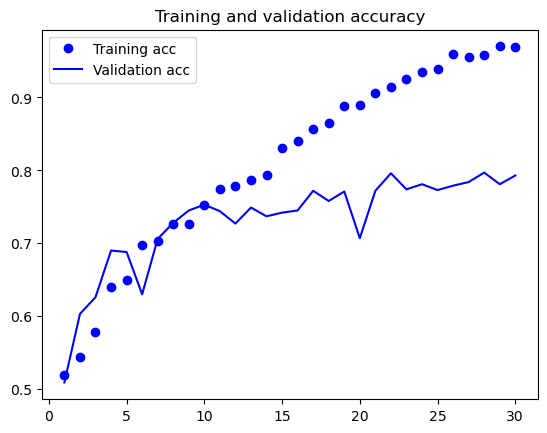

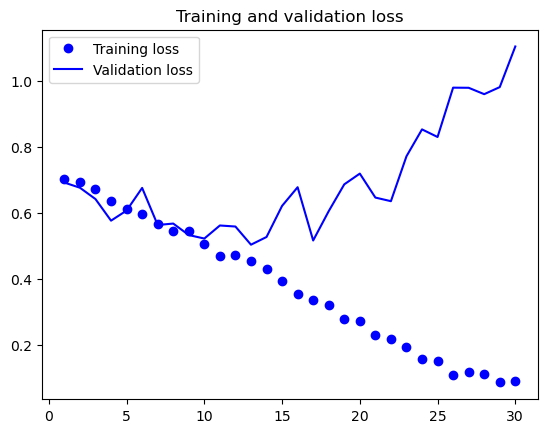

In [11]:
# 网络架构
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())
# 图像预处理
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

from tensorflow import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_1.h5')
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 使用该模型进行预测test_path文件夹里的图片，输出图片为dog的概率
test_path='/Users/a123/vscode/njupt-woc/catdogdata/test'
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import load_model
import csv
model = load_model('cats_and_dogs_small_1.h5')
fnames = sorted([os.path.join(test_path, fname) for fname in os.listdir(test_path)])
i = 0
with open('result1.csv','a') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID','TARGET'])
with open('newresult1.csv','a') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID','TARGET'])
for fname in fnames:
    img = image.load_img(fname, target_size=(150, 150))
    
    # 将图片反色处理
    img = np.asarray(img)
    img = cv2.bitwise_not(img)
    img = Image.fromarray(img)
    # 把图片边缘的黑色去除
    # img = np.asarray(img)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = Image.fromarray(img)
    
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      
    plt.imshow(img_tensor[0])
                            
    
    # 使用model进行预测test_path文件夹里的图片，输出图片为dog的概率
    posibility_of_dog=model.predict(img_tensor)
    posibility_of_dog=round(posibility_of_dog[0][0], 1)
    i += 1
    with open('result1.csv', 'a') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([i, 1-posibility_of_dog])

    with open('newresult1.csv', 'a') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([i, posibility_of_dog])